In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

try :
    os.mkdir("images")
except :
    pass


plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
import io
STRING_CSV="""system,layer,rmid,rmax,width,nlayers
"""


df = pd.read_csv(io.StringIO(STRING_CSV), sep=",")
print(df)

Empty DataFrame
Columns: [system, layer, rmid, rmax, width, nlayers]
Index: []


In [4]:
#  double phi = TMath::ATan2(y,x);
# 	  double rc = x*cos(phim)+y*sin(phim);
# 	  if(mm<42 && rc>rm && rc<rm+2.3 && abs(phi-phim)<dphim){
# 	    hxy->SetBinContent(i,j,n);
# 	  }
# 	  else if(mm>=42 && rc>rm+2.7 && rc<rm+5.0 && abs(phi-phim)<dphim){
# 	    hxy->SetBinContent(i,j,n);
# 	  }   
# 	}
#       }
#     } else if(mm>=84){ //BMT:
#       int m = mm-84;

#       int layer = m/3;
#       int sector = m%3;

#       double radii[] = {146,161,176,191,206,221};
#       double rm = radii[layer], drm = 4;
#       double phisector = -TMath::Pi()/6+sector*TMath::Pi()*2/3;
#       //cout<<  mm << " " << layer << " " << sector << " " << n << " " << phisector*180/TMath::Pi() << endl;
      
#       for(int i = 0; i<hxy->GetNbinsX(); i++){
# 	double x = -R +2*i*R/Nbins;
# 	for(int j = 0; j<hxy->GetNbinsY(); j++){
# 	  double y = -R +2*j*R/Nbins;
# 	  double r = TMath::Hypot(x,y);
# 	  double phi = TMath::ATan2(y,x);
# 	  double dphi = TMath::Pi()/3-0.1;//the width between sectors is not right, but whatever.  
# 	  if(r>rm && r<=rm+drm && abs(angle(phi-phisector))<dphi){
# 	    hxy->SetBinContent(i,j,n);
# 	  }
# 	}
#       }
#     }

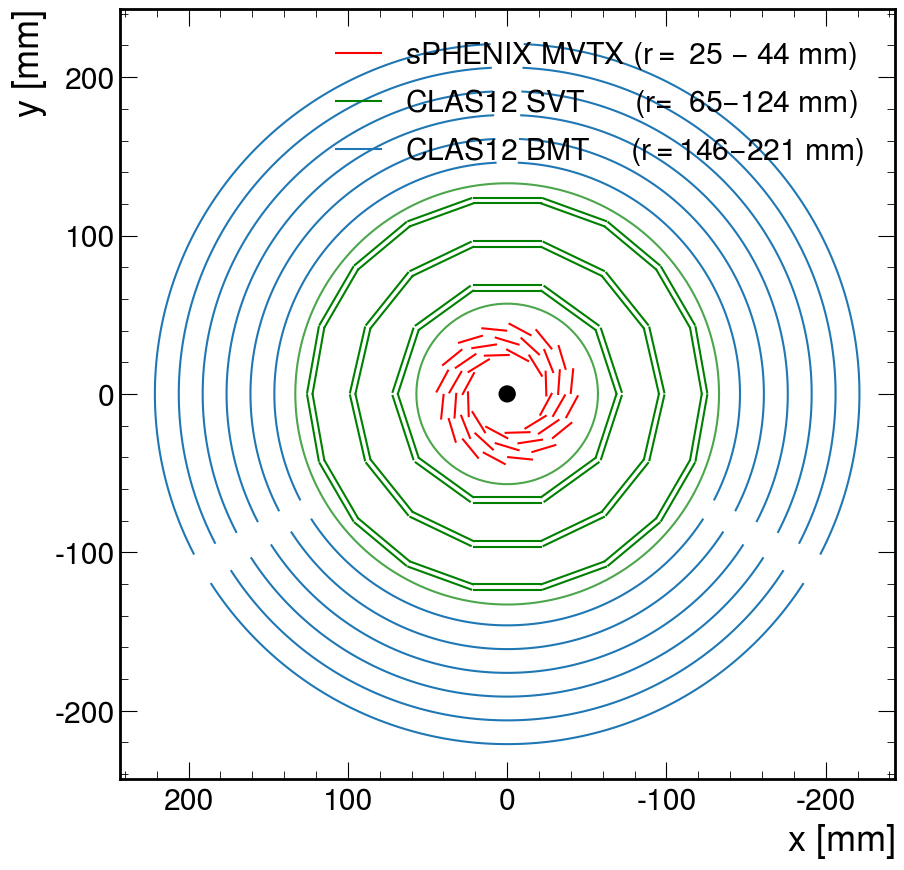

In [5]:
def draw_svt():
    w=42
    dr=2.7
    
    nsectors=[10,10,14,14, 18,18]
    radii=[65.29, 68.77, 92.89, 96.37, 120.32, 123.80]
    args=dict(color='g')
    for layer in range(6):
        r=radii[layer]
        
        for sector in range(nsectors[layer]):
            phimid=-np.pi/2+sector*np.pi*2/nsectors[layer]
            plt.plot([np.cos(phimid)*r-np.sin(phimid)*w/2, np.cos(phimid)*r+np.sin(phimid)*w/2], 
                     [np.sin(phimid)*r+np.cos(phimid)*w/2, np.sin(phimid)*r-np.cos(phimid)*w/2],
                    **args)
    plt.plot([],[], **args, label=f"CLAS12 SVT      ($r$=  {min(radii):.0f}$-${max(radii):.0f} mm)")
    #faraday cage
    phi=np.linspace(-np.pi, np.pi, 181)
    for r in 57,133:
        plt.plot(r*np.cos(phi),r*np.sin(phi), **args,alpha=0.7)
def draw_bmt():
    radii=[146.15, 161.15, 176.15, 191.15, 206.15, 221.15]
    args=dict(color='tab:blue', ls='-')
    for i in range(6):
        for j in range(3):
            phi0=2*np.pi/3*j-np.pi/2
            dphi=2*np.pi/3-0.1
            phi=np.linspace(phi0-dphi/2, phi0+dphi/2,100)
            plt.plot(radii[i]*np.cos(phi), radii[i]*np.sin(phi),
                    **args)
    plt.plot([],[], **args, label=f"CLAS12 BMT     ($r=${min(radii):.0f}$-${max(radii):.0f} mm)")
def draw_mvtx():
    rad_max=[27.93,36.25,44.26]
    rad_mid=[25.23,33.35,41.48]
    rad_min=[24.61,31.98,39.93]
    
    nsectors=[12,14,16]
    w=15
    args=dict(color='r')
    for layer in range(3):
        r=rad_mid[layer]
        for sector in range(nsectors[layer]):
            phimid=(sector+1/2)*np.pi*2/nsectors[layer]
            dphi=np.arcsin((rad_max[layer]**2-r**2-w**2/4)/(r*w))
            plt.plot([np.cos(phimid)*r-np.sin(phimid+dphi)*w/2, np.cos(phimid)*r+np.sin(phimid+dphi)*w/2], 
                     [np.sin(phimid)*r+np.cos(phimid+dphi)*w/2, np.sin(phimid)*r-np.cos(phimid+dphi)*w/2],
                    **args)
    plt.plot([],[], **args, label=f"sPHENIX MVTX ($r=$ {min(rad_min):.0f} $-$ {max(rad_max):.0f} mm)")
def draw_target(r=5):
    import matplotlib.patches as patches
    plt.gca().add_patch(patches.Circle((0,0),r, color='k'))
    
draw_mvtx()
draw_svt()
draw_bmt()
draw_target()
plt.xlabel("$x$ [mm]")
plt.ylabel("$y$ [mm]")
plt.gca().invert_xaxis()
plt.legend()
plt.show()

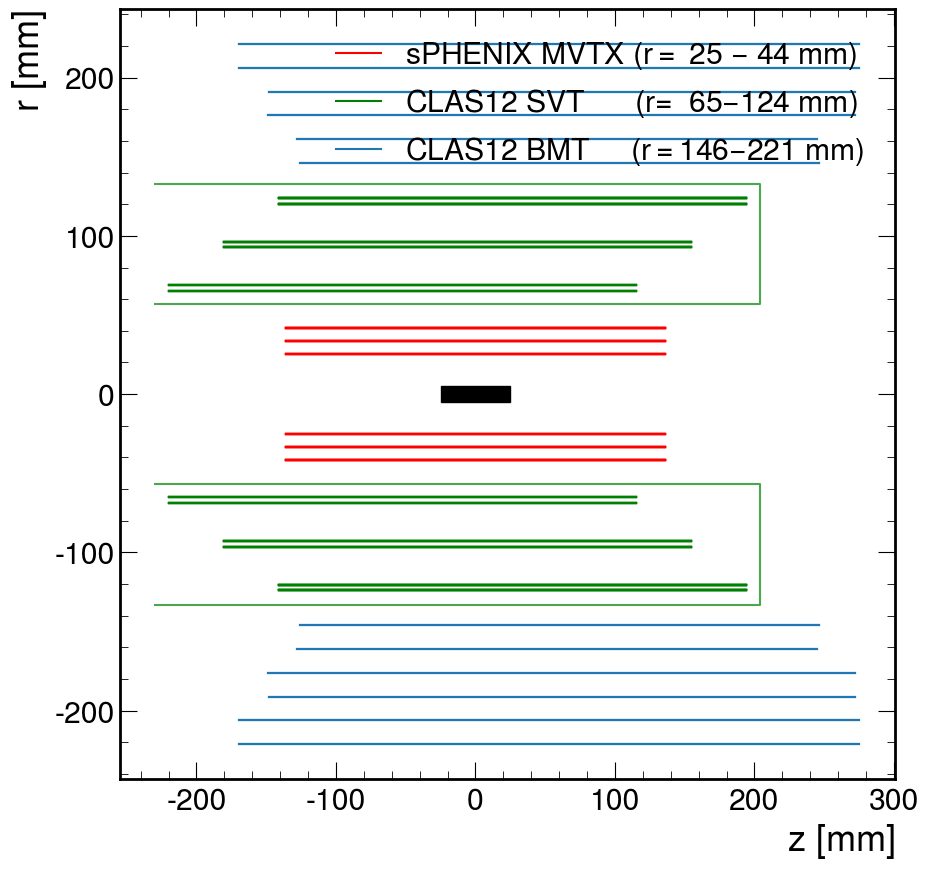

In [43]:
shift_z=-108
def draw_svt_transv():
    w=42
    dr=2.7
    
    nsectors=[10,10,14,14, 18,18]
    radii=[65.29, 68.77, 92.89, 96.37, 120.32, 123.80]
    length=223.3+111.6
    zmin=np.array([-219.826,-219.826, -180.380, -180.380, -141.206, -141.206])
    zmax=zmin+length
    args=dict(color='g')
    for layer in range(6):
        r=radii[layer]
        
        for sector in range(nsectors[layer]):
            phimid=-np.pi/2+sector*np.pi*2/nsectors[layer]
            for s in -1,1:
                plt.plot([zmin[layer], zmax[layer]], [r*s, r*s],
                    **args)
    plt.plot([],[], **args, label=f"CLAS12 SVT      ($r$=  {min(radii):.0f}$-${max(radii):.0f} mm)")
    #faraday cage
    phi=np.linspace(-np.pi, np.pi, 181)
    r1,r2=57,133
    for s in -1,1:
        z1=min(zmin)-10
        z2=max(zmax)+10
        plt.plot([z1, z2,z2,z1], s*np.array([r1,r1,r2,r2]),**args, alpha=0.7)
    
def draw_bmt_transv():
    radii=[146.15, 161.15, 176.15, 191.15, 206.15, 221.15]
    args=dict(color='tab:blue')
    
    #zmin=np.array([-17.9,-19.6, -48.5,-48.0, -69.4,-69.3])+shift_z
    #zmax=np.array([354.5,353.1, 372.5,372.5, 375.5,375.5])+shift_z
    zmin=np.array([-126.07, -127.77, -148.69, -148.23, -169.6, -169.55])
    zmax=np.array([246.25, 244.93, 272.25, 272.25, 275.25, 275.25])
    for i in range(6):
        for j in range(3):
            phi0=2*np.pi/3*j-np.pi/2
            dphi=2*np.pi/3-0.1
            phi=np.linspace(phi0-dphi/2, phi0+dphi/2,100)
            for s in -1,1:
                plt.plot([zmin[i], zmax[i]], [radii[i]*s, radii[i]*s],**args)
    plt.plot([],[], **args, label=f"CLAS12 BMT     ($r=${min(radii):.0f}$-${max(radii):.0f} mm)")
def draw_mvtx_transv(z0=0):
    rad_max=[27.93,36.25,44.26]
    rad_mid=[25.23,33.35,41.48]
    rad_min=[24.61,31.98,39.93]
    
    #z0=51
    #zmin=np.array([-271.2/2+z0]*3)+shift_z
    #zmax=np.array([271.2/2+z0]*3)+shift_z
    zmin=np.array([z0-271.2/2]*3)
    zmax=np.array([z0+271.2/2]*3)                     
                         
    nsectors=[12,14,16]
    w=15
    args=dict(color='r')
    for layer in range(3):
        r=rad_mid[layer]
        for sector in range(nsectors[layer]):
            phimid=(sector+1/2)*np.pi*2/nsectors[layer]
            dphi=np.arcsin((rad_max[layer]**2-r**2-w**2/4)/(r*w))
            for s in -1,1:
                plt.plot([zmin[layer], zmax[layer]], [rad_mid[layer]*s, rad_mid[layer]*s],
                    **args)
    plt.plot([],[], **args, label=f"sPHENIX MVTX ($r=$ {min(rad_min):.0f} $-$ {max(rad_max):.0f} mm)")
def draw_target_transv(r=5, dz=50, z=0):
    import matplotlib.patches as patches
    plt.gca().add_patch(patches.Rectangle((z-dz/2,-r),dz, 2*r, color='k'))
draw_mvtx_transv()
draw_svt_transv()
draw_bmt_transv()
draw_target_transv()
plt.xlabel("$z$ [mm]")
plt.ylabel("$r$ [mm]")
plt.legend()
plt.show()

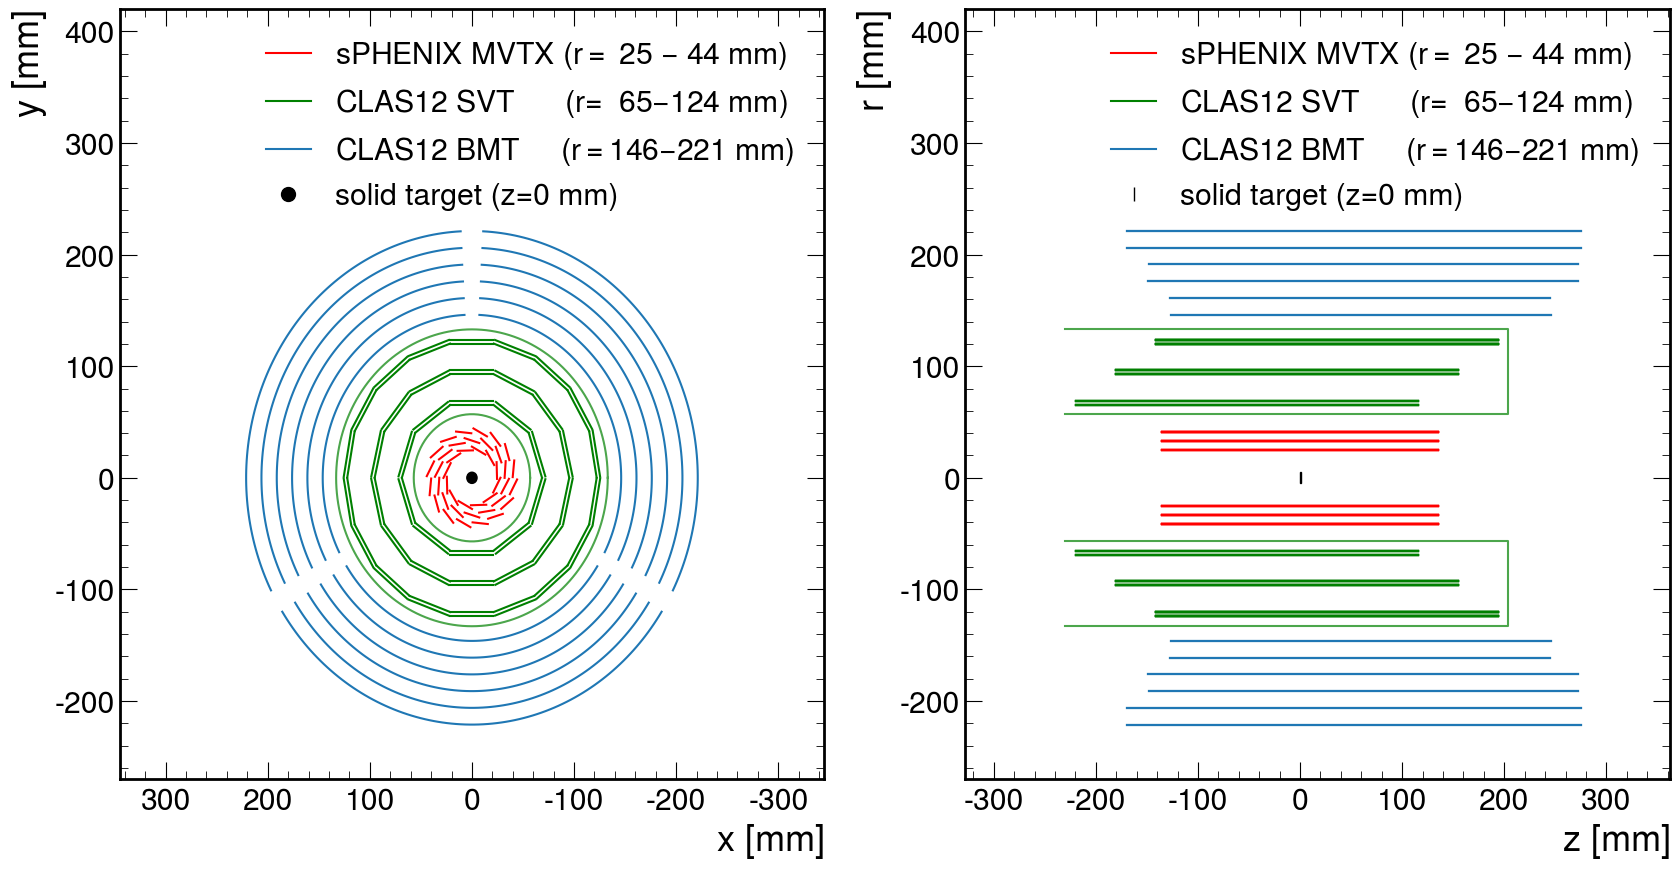

In [44]:
fig, axs=plt.subplots(1,2, figsize=(20,10))
shift_z=-108
zlim=np.array([-220, 470])+shift_z
dy=75
xlim=-(zlim[1]-zlim[0])/2,(zlim[1]-zlim[0])/2
ylim=xlim[0]+dy, xlim[1]+dy
plt.sca(axs[0])
draw_mvtx()
draw_svt()
draw_bmt()
draw_target()
plt.plot([],[], color='k', marker='o', ls='', label='solid target (z=0 mm)',markersize=10)
plt.xlabel("$x$ [mm]")
plt.ylabel("$y$ [mm]")
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.gca().invert_xaxis()
plt.legend()
plt.sca(axs[1])
draw_mvtx_transv()
draw_svt_transv()
draw_bmt_transv()
draw_target_transv(r=5,dz=1)
plt.xlabel("$z$ [mm]")
plt.ylabel("$r$ [mm]")
plt.ylim(*ylim)
plt.xlim(*zlim)
plt.plot([],[], color='k', marker='|', ls='', label='solid target (z=0 mm)',markersize=10)
plt.legend()
plt.show()

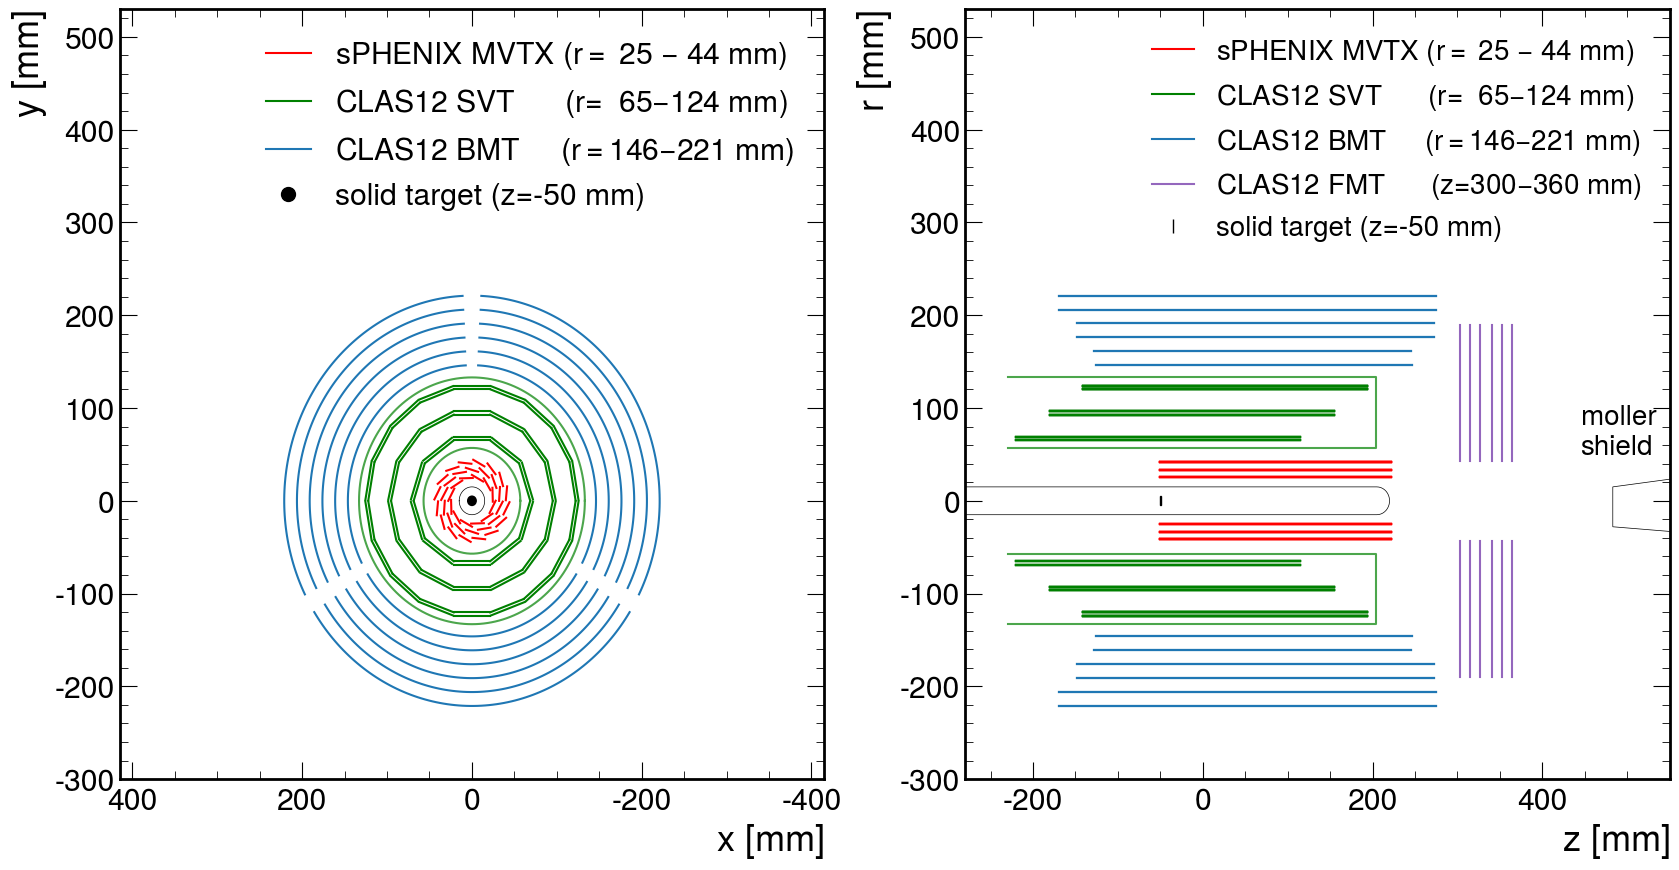

In [70]:
fig, axs=plt.subplots(1,2, figsize=(20,10))
ztarget=-50
#vacuum chamber
vc_r=15
vc_zmax=220
vc_zmin=-283
#shift_z=40#-108
zlim=np.array([-280, 550])#+shift_z
dy=75+40
xlim=-(zlim[1]-zlim[0])/2,(zlim[1]-zlim[0])/2
ylim=xlim[0]+dy, xlim[1]+dy
plt.sca(axs[0])
draw_mvtx()
draw_svt()
draw_bmt()
draw_target()
plt.plot([],[], color='k', marker='o', ls='', label=f'solid target (z={ztarget} mm)',markersize=10)
phi=np.linspace(0, 2*np.pi, 100)
plt.plot(vc_r*np.cos(phi), vc_r*np.sin(phi), color='k', lw=0.5) 
plt.xlabel("$x$ [mm]")
plt.ylabel("$y$ [mm]")
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.gca().invert_xaxis()
plt.legend()
plt.sca(axs[1])
draw_mvtx_transv(271.2/2+ztarget)
draw_svt_transv()
draw_bmt_transv()
plt.xlabel("$z$ [mm]")
plt.ylabel("$r$ [mm]")
plt.ylim(*ylim)
plt.xlim(*zlim)

#things from the beamline diagram:
shift=0
phi=np.linspace(np.pi/2, -np.pi/2, 20)
plt.plot([vc_zmin, vc_zmax-vc_r]+list((vc_zmax-vc_r)+vc_r*np.cos(phi))+ [vc_zmax-vc_r, vc_zmin], 
         [vc_r, vc_r]+list(vc_r*np.sin(phi))+[-vc_r, -vc_r], color='k', lw=0.5)  #vacuum chamber
ms_r=28
plt.plot([750, 483, 483, 750], [ms_r+20, vc_r, -ms_r, -ms_r-20], color='k', lw=0.5)  #moller shield
plt.text(445, 50,"moller\nshield", fontsize=20)
#FMT
zs=np.array([302.967, 314.897, 326.797, 340.697, 352.597, 364.497])
for z in zs:
    for s in -1,1:
        plt.plot([z+shift,z+shift],[s*86/2, s*380/2], color='tab:purple')
plt.plot([],[], color='tab:purple', label='CLAS12 FMT      (z=300$-$360 mm)')
draw_target_transv(r=5,dz=1,z=ztarget)
plt.plot([],[], color='k', marker='|', ls='', label=f'solid target (z={ztarget} mm)',markersize=10)

plt.legend(fontsize=20)
plt.savefig("images/mvtx_two_views.pdf")
plt.show()

In [9]:
radii=[65.29, 68.77, 92.89, 96.37, 120.32, 123.80]
zmin=[-111.6,-111.6, -72.2,-72.2, -32.0,-32.0]
zmax=[223.3,223.3, 262.7,262.7, 302.9,302.9]
z2=(zmax[5]+zmax[4])/2
r2=(radii[5]+radii[4])/2 
z1=(zmax[1]+zmax[0])/2
r1=(radii[1]+radii[0])/2  
print(z2+(41.48-r2)*(z2-z1)/(r2-r1)-271.2/2)

50.74234054152285


In [59]:
np.arctan2(380, 360)*180/np.pi

46.548157698977974

In [60]:
np.arctan2(86, 300)*180/np.pi

15.995832313522914

In [64]:
np.arctan2(41.48,271.2)*180/np.pi

8.695988615177527